In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fanty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv('D:/labeled.csv', sep=',')

In [6]:
df.shape

(14412, 2)

In [7]:
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
5,Для каких стан является эталоном современная с...,1.0
6,В шапке были ссылки на инфу по текущему фильму...,0.0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0
8,"Ебать тебя разносит, шизик.\n",1.0
9,"Обосрался, сиди обтекай\n",1.0


In [8]:
df.toxic.astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
14407    1
14408    1
14409    0
14410    1
14411    0
Name: toxic, Length: 14412, dtype: int32

In [9]:
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [10]:
df['toxic'] = df['toxic'].apply(int)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [11]:
df['toxic'].value_counts() #9586 non-toxic comments / 4826 toxic comments

0    9586
1    4826
Name: toxic, dtype: int64

In [12]:
for i in df[df['toxic'] == 1]['comment'].head():
    print(i)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [13]:
for i in df[df['toxic'] == 0]['comment'].head():
    print(i)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [14]:
train_df, test_df = train_test_split(df, test_size=500)

In [15]:
test_df.shape

(500, 2)

In [16]:
test_df['toxic'].value_counts()

0    334
1    166
Name: toxic, dtype: int64

In [17]:
train_df['toxic'].value_counts()

0    9252
1    4660
Name: toxic, dtype: int64

In [18]:
sentence_example = df.iloc[1]['comment']
tokens = word_tokenize(sentence_example, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stopwords = stopwords.words('russian')
tokens_without_stopwords_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stopwords]
snowball = SnowballStemmer(language='russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stopwords_and_punctuation]

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fanty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
print(f'Original text: {sentence_example}')
print('____________________________')
print(f'Tokens: {tokens}')
print('____________________________')
print(f'Tokens without punctuation: {tokens_without_punctuation}')
print('____________________________')
print(f'Tokens without punctuation and stopwords: {tokens_without_stopwords_and_punctuation}')
print('____________________________')
print(f'Tokens after stemming: {stemmed_tokens}')
print('____________________________')


Original text: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

____________________________
Tokens: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
____________________________
Tokens without punctuation: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
____________________________
Tokens without punctuation and stopwords: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
____________________________
Tokens after stemming: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']
____________

In [21]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")
                                                     
def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [22]:
# Example of how func works
tokenize_sentence(df.comment[3])

['страниц',
 'обнов',
 'деб',
 'эт',
 'оскорблен',
 'доказа',
 'факт',
 'не-деб',
 'множествен',
 'числ',
 'писа',
 'ил',
 'вер',
 'эт',
 'тво',
 'вообража',
 'друз']

In [23]:
vectorizer = TfidfVectorizer(tokenizer= lambda x: tokenize_sentence(x, remove_stop_words=True))

In [24]:
feautures = vectorizer.fit_transform(train_df['comment'])

In [25]:
model = LogisticRegression(random_state=0)
model.fit(feautures, train_df['toxic'])

LogisticRegression(random_state=0)

In [26]:
# Predicts that comment is toxic
model.predict(feautures[0])

array([0], dtype=int64)

In [27]:
# Actual comment
train_df.comment.iloc[0]

'Летел из Китая в субботу. Всем пофиг. Причем спросили, а у вас есть батареи в багаже. Я говорю есть - 4 Айфона (кого я обманываю, я нищеброд. 4 китайфона.) Батареи не съёмные. Сказали Окай, что делать то. И повербанк на 20к с собой.'

In [28]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [29]:
model_pipeline.fit(train_df['comment'], train_df['toxic'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000020DFA7ABAF0>)),
                ('model', LogisticRegression(random_state=0))])

In [30]:
# Test
model_pipeline.predict(['Я их всех в рот ебал'])

array([1], dtype=int64)

In [31]:
model_pipeline.predict(['Я надеюсь у вас все отлично'])

array([0], dtype=int64)

In [32]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.8688524590163934

In [33]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.6385542168674698

In [34]:
prec ,rec ,thresholds = precision_recall_curve(y_true=test_df['toxic'], probas_pred = model_pipeline.predict_proba(test_df['comment'])[:,1])

c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


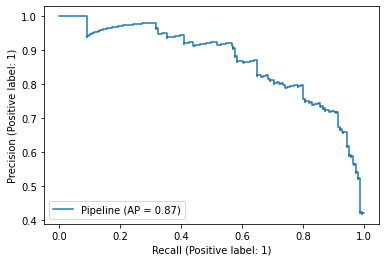

In [35]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df['comment'], y=test_df['toxic'])

In [36]:
np.where(prec > 0.95)

(array([334, 335, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
        351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
        364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 381,
        382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394,
        395, 396], dtype=int64),)

In [37]:
thresholds[257]

0.4646133044583719

In [38]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df['comment'])[:,1] > thresholds[257])

0.8260869565217391

In [39]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df['comment'])[:,1] > thresholds[257])

0.6867469879518072

In [40]:
grid_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ('model', GridSearchCV(LogisticRegression(random_state=0), param_grid={'C': [0.1,1, 10.]}, cv=3, verbose=4))
])

In [41]:
grid_pipeline.fit(train_df['comment'], train_df['toxic'])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.685 total time=   0.3s
[CV 2/3] END .............................C=0.1;, score=0.693 total time=   0.5s
[CV 3/3] END .............................C=0.1;, score=0.685 total time=   0.3s
[CV 1/3] END ...............................C=1;, score=0.843 total time=   0.8s
[CV 2/3] END ...............................C=1;, score=0.838 total time=   0.8s
[CV 3/3] END ...............................C=1;, score=0.838 total time=   0.8s


c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ............................C=10.0;, score=0.870 total time=   1.2s


c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ............................C=10.0;, score=0.869 total time=   1.2s


c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ............................C=10.0;, score=0.863 total time=   1.3s


c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000020DFB5DE0D0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [42]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10.))
]
)

In [43]:
model_pipeline_c_10.fit(train_df['comment'], train_df['toxic'])

c:\users\fanty\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000020DFB5DE3A0>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [44]:
prec_c_10 ,rec_c_10 ,thresholds_c_10 = precision_recall_curve(y_true=test_df['toxic'], probas_pred = model_pipeline_c_10.predict_proba(test_df['comment'])[:,1])

In [45]:
np.where(prec_c_10 > 0.95)

(array([323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
        336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
        349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
        362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
        388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400,
        401, 402, 403, 404, 405, 406, 407, 408, 409, 410], dtype=int64),)

In [46]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline_c_10.predict_proba(test_df['comment'])[:,1] > thresholds_c_10[293])

0.8620689655172413

In [47]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline_c_10.predict_proba(test_df['comment'])[:,1] > thresholds_c_10[293])

0.6024096385542169

In [49]:
# Finl test
model_pipeline_c_10.predict(['Собаке - собачья смерть'])

array([1], dtype=int64)